In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


df = pd.read_csv("Salary_Data.csv")
df.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### Rename the first column to 'Years_Experience'

In [161]:
df.rename(columns={'YearsExperience':'Years_Experience'},inplace=True)
df.head()

,Years_Experience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### Years Experience vs. Salary

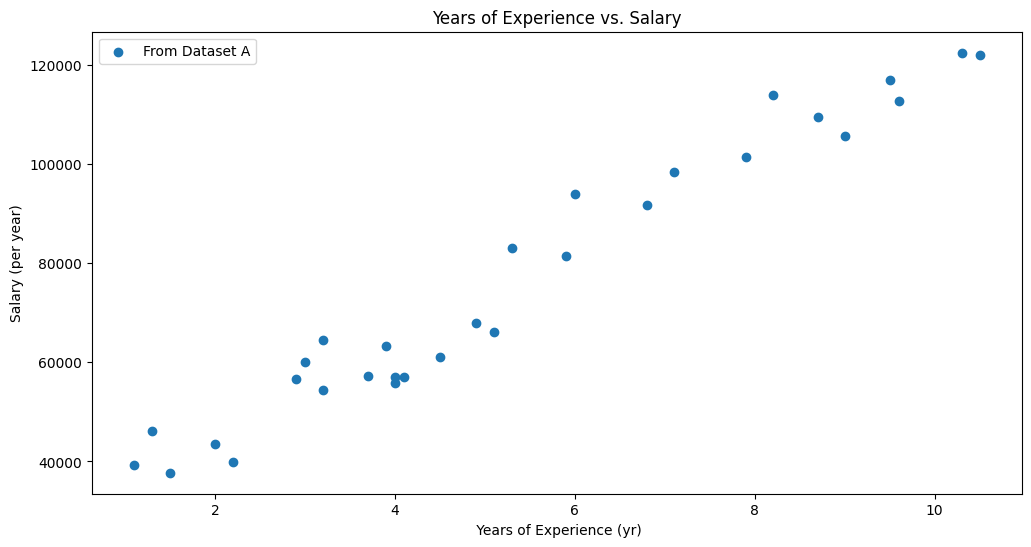

In [162]:
plt.figure(figsize=(12,6))
plt.scatter(df['Years_Experience'], df["Salary"], label='From Dataset A')
plt.xlabel(" Years of Experience (yr)")
plt.ylabel("Salary (per year)")
plt.legend(loc='upper left')
plt.title("Years of Experience vs. Salary")
plt.show()

## 把資料標準化

In [163]:
#做標準化
# https://www.geeksforgeeks.org/how-to-standardize-data-in-a-pandas-dataframe/
# https://sparkbyexamples.com/pandas/normalize-columns-of-pandas-dataframe/
scaler = StandardScaler()  
std_df = scaler.fit_transform(df)

std_df

array([[-1.51005294, -1.36011263],
       [-1.43837321, -1.10552744],
       [-1.36669348, -1.419919  ],
       [-1.18749416, -1.20495739],
       [-1.11581443, -1.33978143],
       [-0.86493538, -0.71830716],
       [-0.82909552, -0.58815781],
       [-0.75741579, -0.79981746],
       [-0.75741579, -0.42881019],
       [-0.57821647, -0.69801306],
       [-0.50653674, -0.47433279],
       [-0.47069688, -0.74976858],
       [-0.47069688, -0.70662043],
       [-0.43485702, -0.70201994],
       [-0.29149756, -0.55250402],
       [-0.1481381 , -0.29921736],
       [-0.07645838, -0.37004264],
       [-0.00477865,  0.26285865],
       [ 0.21026054,  0.19885989],
       [ 0.2461004 ,  0.66547573],
       [ 0.53281931,  0.58377993],
       [ 0.6403389 ,  0.82623317],
       [ 0.92705781,  0.93861127],
       [ 1.03457741,  1.40274136],
       [ 1.21377673,  1.24020308],
       [ 1.32129632,  1.09740238],
       [ 1.50049564,  1.51986835],
       [ 1.5363355 ,  1.3590738 ],
       [ 1.78721455,

### Both X and y need to be 2D arrays -> Use .reshape( )

In [164]:
X = std_df[:,0].reshape(30,1)
y = std_df[:,1].reshape(30,1)

### Plotting the normalized Years_Experience(X) vs. Salary(y)

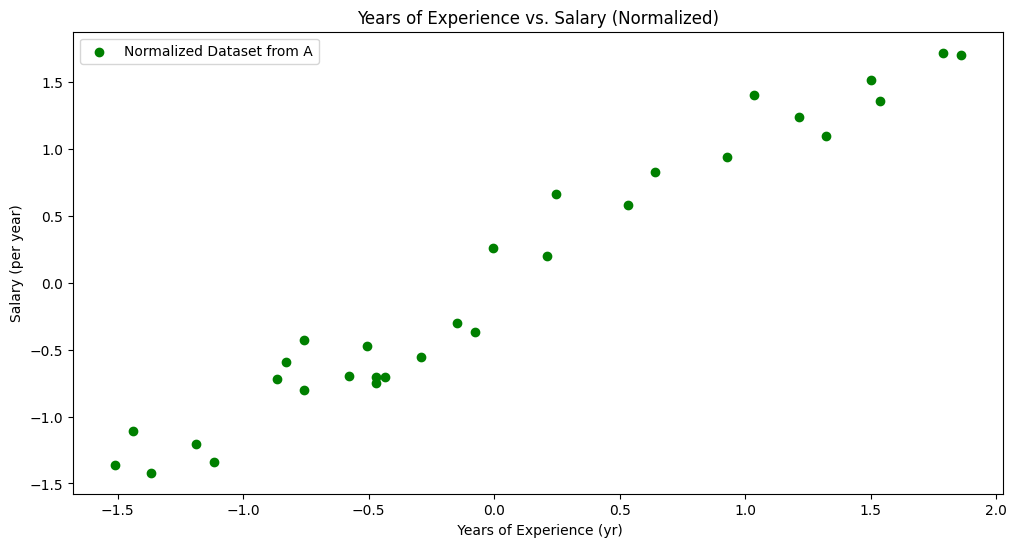

In [165]:
plt.figure(figsize=(12,6))
plt.scatter(X,y, color='green', label='Normalized Dataset from A')
plt.xlabel(" Years of Experience (yr)")
plt.ylabel("Salary (per year)")
plt.legend(loc='upper left')
plt.title("Years of Experience vs. Salary (Normalized)")
plt.show()

### Test & Train split visualization

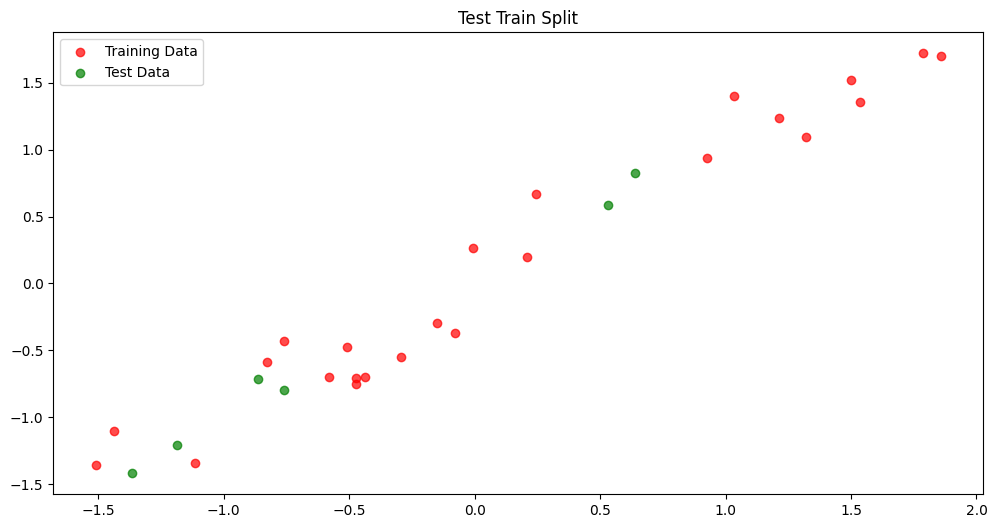

In [166]:
train_x, test_x, train_y, test_y  = train_test_split(X, y, test_size=0.2, random_state=10)

plt.figure(figsize=(12,6))
plt.scatter(train_x,train_y, label='Training Data', color='red', alpha=0.7)
plt.scatter(test_x,test_y, label='Test Data', color='green', alpha=0.7)
plt.legend()
plt.title("Test Train Split")
plt.show()

### Linear Regression on normalized values

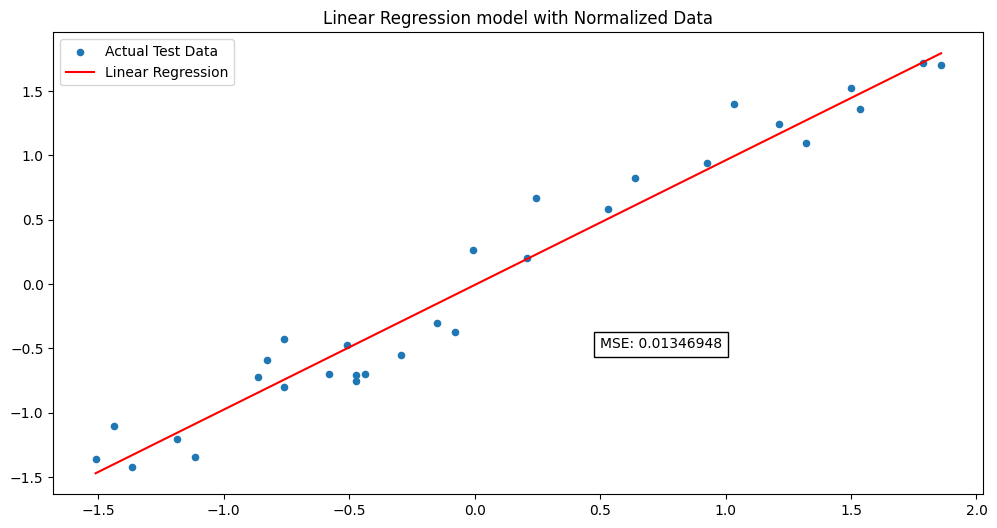

In [167]:
regression = LinearRegression()
regression.fit(train_x, train_y)
y_p = regression.predict(test_x)
Y_pred = regression.predict(X)

plt.figure(figsize=(12,6))
plt.scatter(X, y, s = 20, label='Actual Test Data')
plt.plot(X,Y_pred, color = 'red', label='Linear Regression')
plt.legend()
plt.title("Linear Regression model with Normalized Data")
plt.text(0.5,-0.5,f'MSE: {mean_squared_error(test_y, y_p):.8f}',bbox=dict(facecolor='white',edgecolor='black'))

plt.show()

### Using Unnormalized values:

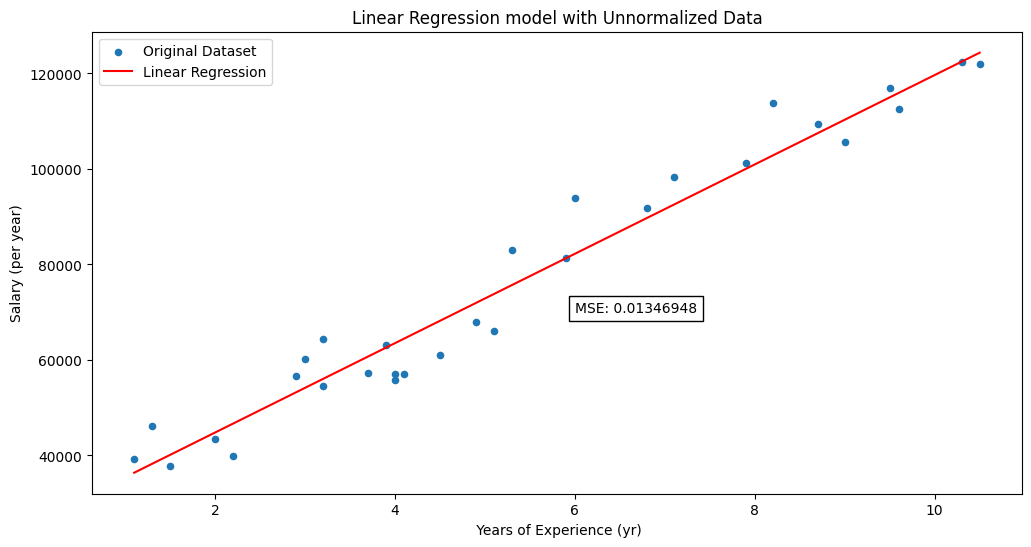

In [168]:
# Linear regression on unstandardized values
X_df = df.loc[:,"Years_Experience"].to_numpy().reshape(30,1)
y_df = df.loc[:,"Salary"].to_numpy().reshape(30,1)

# Create test and training data
train_xdf, test_xdf, train_ydf, test_ydf  = train_test_split(X_df, y_df, test_size=0.2, random_state=10)

regression_df = LinearRegression()
regression_df.fit(train_xdf, train_ydf)
y_p_df = regression_df.predict(test_xdf)
Y_pred_df = regression_df.predict(X_df)

plt.figure(figsize=(12,6))
plt.scatter(X_df, y_df, s = 20, label='Original Dataset')
plt.plot(X_df,Y_pred_df, color = 'red', label='Linear Regression')
plt.legend()
plt.xlabel(" Years of Experience (yr)")
plt.ylabel("Salary (per year)")
plt.title("Linear Regression model with Unnormalized Data")
plt.text(6,70000,f'MSE: {mean_squared_error(test_y, y_p):.8f}',bbox=dict(facecolor='white',edgecolor='black'))

plt.show()